# Analysis

- **Observed Trend 1**: CBS tweets tended to be the most positive in sentiment out of all media outlets examined.
- **Observed Trend 2**: The New York Times tended to be most neutral in its overall tweet sentiment, though individual tweets sentiment varied greatly.
- **Observed Trend 3**: On average, CNN tweets tended to be more negative in sentiment than the other media outlets examined.

# Getting Started: Importing Dependencies and Data

In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
import seaborn as sns
import os

# Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
consumer_key = "nXvio0VhsbeowkFG262PCz2AV"
consumer_secret = "UtZRtxvBzSgKYIfaq05upDA327IGispSWJkSNjrImI6Ejytv5N"
access_token = "944969564483473408-vYoVaLuWm4kSFPIvk7grcGgf99wFTU3"
access_token_secret = "SjtWXERhQuE8Ict6SlcVLvfN3nieRS7HX652borA4VXTx"

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
# Target Accounts
target_users = ['@BBC', '@CBS', '@CNN', '@FoxNews', '@nytimes']

# Array for holding sentiments
sentiments = []

# Loop through 5 pages of tweets (total 100 tweets) for each target user.
for target_user in target_users:
    
    # Counter
    counter = 1

    for x in range(5):

        # Get all tweets from home feed
        public_tweets = api.user_timeline(target_user)
        
        # Loop through all tweets 
        for tweet in public_tweets:
        
            # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet['text'])['compound']
            pos = analyzer.polarity_scores(tweet['text'])['pos']
            neu = analyzer.polarity_scores(tweet['text'])['neu']
            neg = analyzer.polarity_scores(tweet['text'])['neg']
            tweets_ago = counter
            
            # Add sentiments for each tweet into an array
            sentiments.append({'User': tweet['user']['name'],
                               'Date': tweet['created_at'],
                               'Tweet Text': tweet['text'],
                               'Compound': compound,
                               'Positive': pos,
                               'Negative': neu,
                               'Neutral': neg,
                               'Tweets Ago': counter})
            
            counter = counter + 1

In [3]:
# Create dataframe from sentiments array
sentiments_df = pd.DataFrame.from_dict(sentiments)

# Reorder columns
sentiments_df = sentiments_df[['User', 'Date', 'Tweet Text', 'Tweets Ago',
                               'Positive', 'Negative', 'Neutral', 'Compound']]

# Save dataframe as csv for future reference.
output_path = os.path.join('output', 'tweet-data_2017-12-24.csv')
sentiments_df.to_csv(output_path)

# Preview dataframe
sentiments_df.head()

,User,Date,Tweet Text,Tweets Ago,Positive,Negative,Neutral,Compound
0,BBC,Sun Dec 24 21:43:10 +0000 2017,Toasters: sworn enemy of the pet cat. \n\n#Doo...,1,0.000,0.800,0.200,-0.5423
1,BBC,Sun Dec 24 20:03:04 +0000 2017,Will you struggle to nod off knowing that Sant...,2,0.000,0.909,0.091,-0.3182
2,BBC,Sun Dec 24 19:33:04 +0000 2017,Leonardo DiCaprio and Carey Mulligan star in a...,3,0.119,0.881,0.000,0.3182
3,BBC,Sun Dec 24 19:03:04 +0000 2017,"Tonight, @BillBailey, @Seal and @AleshaOfficia...",4,0.378,0.622,0.000,0.7845
4,BBC,Sun Dec 24 18:57:04 +0000 2017,RT @BBCiPlayer: 🐶 Cuteness alert! @Sukiandthe...,5,0.492,0.508,0.000,0.8655


# Scatter Plot: Media Tweet Polarity Over Time

Scatter plot of sentiments of the last 100 tweets sent out by each news organization, ranging from -1.0 to 1.0, where a score of 0 expresses a neutral sentiment, -1 the most negative sentiment possible, and +1 the most positive sentiment possible.
Each plot point reflects the compound sentiment of a tweet.

In [4]:
# Get list of users as they appear in dataframe
sentiments_df['User'].unique()

array(['BBC', 'CBS', 'CNN', 'Fox News', 'The New York Times'], dtype=object)

In [5]:
# Create scatter plot for sentiments

# Add data to plot for BBC tweets.
bbc = plt.scatter(sentiments_df.loc[sentiments_df['User']=='BBC', 'Tweets Ago'],
                  sentiments_df.loc[sentiments_df['User']=='BBC', 'Compound'],
                  label='BBC', color='skyblue', alpha=.75, edgecolor='black')

# Add data to plot for CBS tweets.
cbs = plt.scatter(sentiments_df.loc[sentiments_df['User']=='CBS', 'Tweets Ago'],
                  sentiments_df.loc[sentiments_df['User']=='CBS', 'Compound'],
                  label='CBS', color='seagreen', alpha=.75, edgecolor='black')

# Add data to plot for CNN tweets.
cnn = plt.scatter(sentiments_df.loc[sentiments_df['User']=='CNN', 'Tweets Ago'],
                  sentiments_df.loc[sentiments_df['User']=='CNN', 'Compound'],
                  label='CNN', color='r', alpha=.75, edgecolor='black')

# Add data to plot for Fox News tweets.
fox = plt.scatter(sentiments_df.loc[sentiments_df['User']=='Fox News', 'Tweets Ago'],
                  sentiments_df.loc[sentiments_df['User']=='Fox News', 'Compound'],
                  label='Fox News', color='b', alpha=.75, edgecolor='black')

# Add data to plot for NYT tweets.
nyt = plt.scatter(sentiments_df.loc[sentiments_df['User']=='The New York Times', 'Tweets Ago'],
                  sentiments_df.loc[sentiments_df['User']=='The New York Times', 'Compound'],
                  label='The New York Times', color='gold', alpha=.75, edgecolor='black')

# Set x and y limits.
plt.xlim(105, -5)
plt.ylim(-1.05, 1.05)

# Add a legend outside the plot area.
legend = plt.legend(handles=[bbc, cbs, cnn, fox, nyt], title='Media Sources',
                    bbox_to_anchor=(1, 1))

# Add labels to the x and y axes and give the chart a title.
plt.xlabel('Tweets Ago')
plt.ylabel('Tweet Polarity')
plt.title('Sentiment Analysis of Media Tweets (12/24/2017)')

# Use seaborn library to set the grid background style.
sns.set_style('darkgrid')

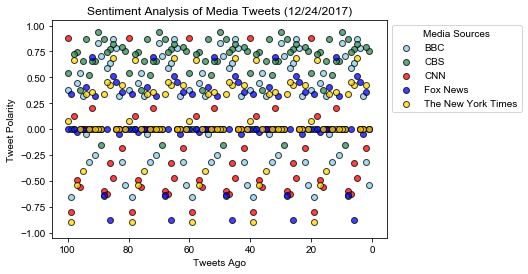

In [6]:
# Save plot to output folder and display
output_path = os.path.join('output', 'tweet-sentiment-scatterplot.png')
plt.savefig(output_path, dpi=100, bbox_extra_artists=(legend,),bbox_inches='tight')
plt.show()

# Bar Plot: Media Sentiment by Outlet

Bar plot visualizing the overall sentiments of the last 100 tweets from each news organization.

In [7]:
# Group tweets by media outlet
grouped_sentiments = pd.DataFrame(sentiments_df.groupby('User')['Compound'].mean()).reset_index()
grouped_sentiments.head()

,User,Compound
0,BBC,0.181565
1,CBS,0.565760
2,CNN,-0.142605
3,Fox News,0.074960
4,The New York Times,0.096695


In [10]:
# Define positions for bars to appear on x-axis.
xpos = [0, .8, 1.6, 2.4, 3.2]

# Create plot, set bar colors, and set edge colors.
plt.bar(xpos, grouped_sentiments['Compound'],
        color=['skyblue', 'seagreen', 'r', 'b', 'gold'],
        edgecolor=['black']*5)

# Add x labels at appropriate locations, rotated 45 degrees.
plt.xticks(xpos, grouped_sentiments['User'], rotation=45)

# Make plot background area grey
sns.set_style('dark')

# Set x limits
plt.xlim(-.4, 3.61)

# Set x- and y-axis labels, add chart title.
plt.xlabel('Media Source')
plt.ylabel('Tweet Polarity')
plt.title('Overall Media Sentiment Based on Twitter (12/24/2017)')

Text(0.5,1,'Overall Media Sentiment Based on Twitter (12/24/2017)')

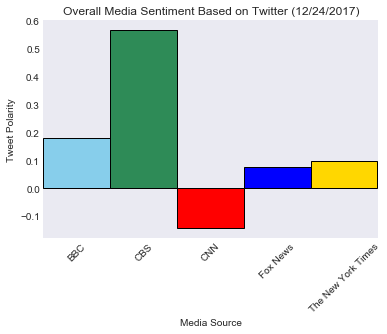

In [11]:
# Save plot and display.
output_path = os.path.join('output', 'tweet-sentiment-barplot.png')
plt.savefig(output_path, dpi=100,bbox_inches='tight')
plt.show()